# Unsupervised Learning with python

- unsupervised learning finds patterns in data
- e.g., clustering customers by their purchases
- compressing the data using purchase patters (dimension reduction)
  


supervised learning finds patterns for a prediction task. Eg, classify tumors as benign or cancerous (labels). 
- unsupervised learning finds patterns in data but without a specific prediction task in mind.

### k-means clustering
- finds clusters of samples
- number of clusters must be specified
- implemented in sklearn

### Cluster labels for new samples
- new samples can be assigned to existing clusters
- k-means remembers the mean of each cluster (the "centroids")
- finds the nearest centroid to each new sample

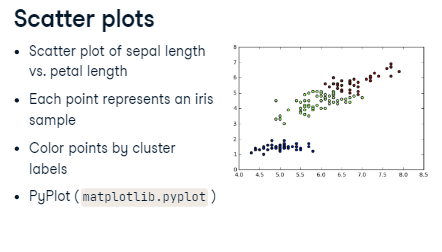

Original points:
 [[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]
 [-3.11090424 10.86656431]
 [ 4.99689432  1.28026009]
 [-2.30033403  7.054616  ]
 [-3.92456837  8.59364081]
 [-7.53026976 -7.36723498]
 [-3.21125072  8.68662398]
 [-8.50716963 -6.83202465]
 [ 2.61473625  2.159624  ]
 [-2.41212007  9.98293112]
 [-1.92234053 11.20474175]
 [-1.35060204  8.19360381]
 [-2.67048333  9.41833699]
 [ 5.61499857  1.8261123 ]
 [-6.99195524 -7.10107919]
 [-2.97261532  8.54855637]
 [-6.34982301 -5.43854097]
 [-7.45639852 -6.12471837]
 [ 3.82165815  4.06555696]
 [ 4.62763206  1.07591531]
 [-3.39871205  8.19847584]
 [-3.49973395  8.4479884 ]
 [-3.58009012  9.49675854]
 [-6.04929137 -7.73619342]
 [-2.29510388  7.76854735]
 [-8.39481825 -5.51323533]
 [-2.28173769 10.32142888]
 [-6.12263

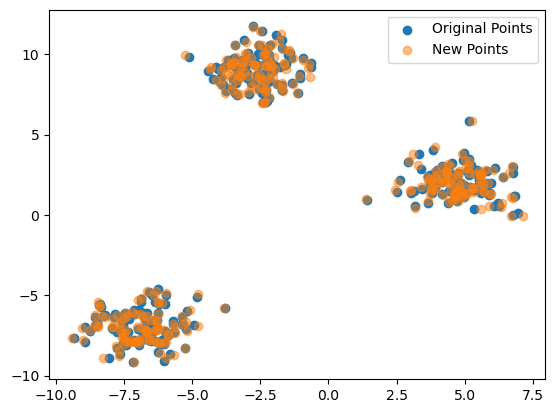

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate the original data
points, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Step 2: Create new_points by adding noise to the original points
noise = np.random.normal(0, 0.1, points.shape)
new_points = points + noise

# Step 3: Print both arrays (optional)
print("Original points:\n", points)
print("New points:\n", new_points)

# Step 4: Plot both scatter plots
plt.scatter(points[:, 0], points[:, 1], label='Original Points')
plt.scatter(new_points[:, 0], new_points[:, 1], label='New Points', alpha=0.5)
plt.legend()
plt.show()

# Optional: Save both arrays to files
np.savetxt("points.csv", points, delimiter=",", header="x,y", comments='')
np.savetxt("new_points.csv", new_points, delimiter=",", header="x,y", comments='')
np.save("points.npy", points)
np.save("new_points.npy", new_points)

#generated these from chatgpt for help

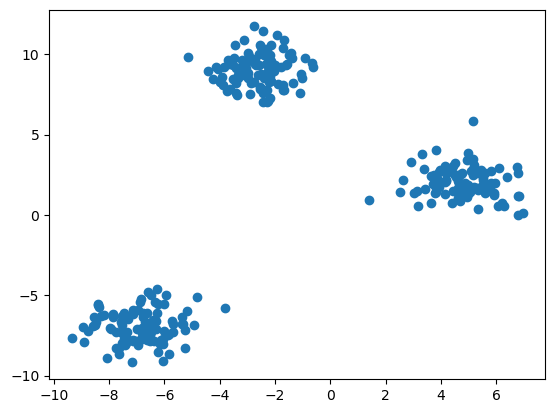

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
xs= points[:,0]
ys = points[:,1]
plt.scatter(xs,ys)
plt.show()

In [35]:
# Import KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(new_points)
print(labels)

C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 0 1 2 0 2 1 2 1 1 1 2 1 1 0 1 0 2 1 1 1 1 2 0 1 0 0 2 2 1 1 1 0 1 0 1 0
 2 0 2 2 1 0 2 1 1 0 2 0 2 2 0 0 1 0 2 0 1 2 1 0 2 2 0 0 2 2 0 0 1 2 0 0 1
 1 0 0 2 1 2 1 1 0 1 2 0 0 1 2 1 0 1 0 1 1 0 0 1 0 0 2 1 2 1 1 1 1 1 2 0 2
 1 1 1 1 2 0 2 0 2 2 2 1 0 0 0 0 1 0 0 1 1 1 1 1 2 2 0 1 0 1 1 0 1 2 2 2 1
 2 1 1 0 2 0 1 2 2 0 0 1 1 0 0 0 1 0 2 1 1 1 1 1 2 1 2 2 2 1 2 2 0 1 0 2 2
 0 2 1 2 2 0 0 2 0 2 2 2 2 1 0 1 1 2 2 1 2 0 0 2 1 1 0 2 2 0 0 0 0 1 0 0 2
 0 0 1 2 0 0 2 1 1 0 1 0 2 2 0 2 0 0 0 2 2 1 0 2 2 2 0 2 0 2 0 2 2 0 2 1 0
 1 1 1 0 1 2 2 0 2 2 1 1 2 2 2 0 0 0 1 1 1 2 2 2 2 0 2 0 2 2 0 1 2 2 1 0 1
 2 1 0 0]


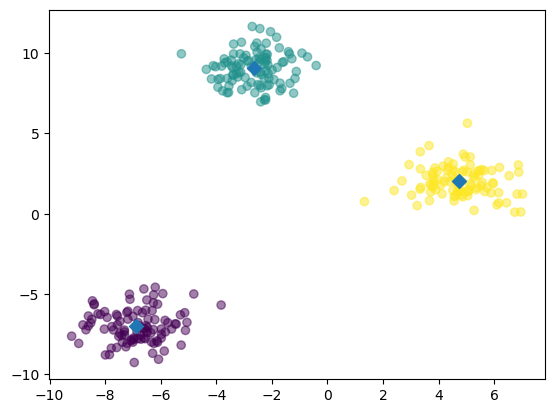

In [36]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


# Evaluating a clustering
- can check correspondence with e.g. iris species.
- but what id there are no species to check against? Measure quality of clustering.
- informs choice of how many clusters to look for
# cross tabulation with pandas
- clusters vs species is a "cross-tabulation"
- use the pandas lib
- given the species of each sample as a list species
# measuring clustering quality
- using only samples and their cluster labels
- a good clustering has tight clusters
- samples in each cluster bunched together
# inertia measures clustering quality
- measures how spread out the cluster as (lower is better)
- distance from each sample to centroid of its cluster
- after fit() , available as attribute inertia_
- k-means attempts to minimize the inertia when choosing clusters

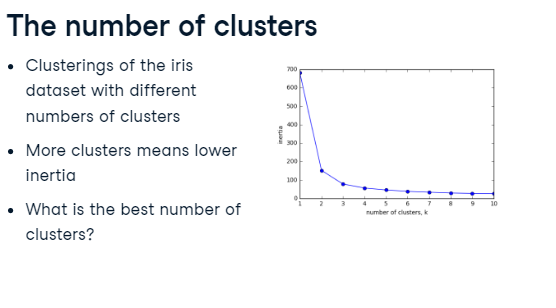

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate a synthetic dataset with 300 samples and 5 features
np.random.seed(42)
samples = np.random.rand(300, 5) * [200, 100, 15, 5, 0.8]  # Scale the features to be realistic

# Define the range of cluster numbers
ks = range(1, 6)
inertias = []


C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

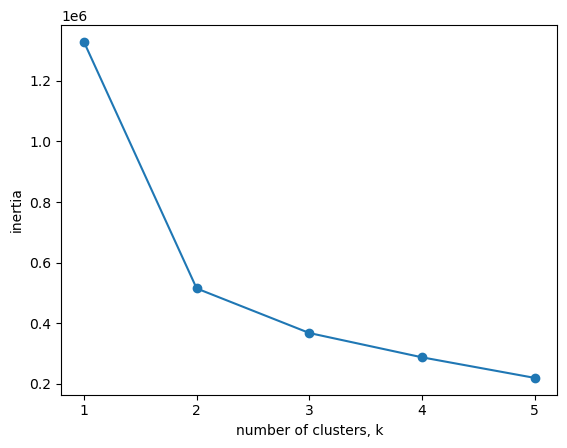

In [50]:
ks = range(1, 6)
inertias = []

for k in ks:
        # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic data
np.random.seed(42)

# Parameters for the grain varieties
num_samples = 100
kama = np.random.randn(num_samples, 5) * [50, 10, 2, 0.5, 0.1] + [200, 100, 15, 5, 0.8]
rosa = np.random.randn(num_samples, 5) * [50, 10, 2, 0.5, 0.1] + [150, 80, 12, 4, 0.6]
canadian = np.random.randn(num_samples, 5) * [50, 10, 2, 0.5, 0.1] + [100, 60, 10, 3, 0.5]

# Combine into one dataset
samples = np.vstack([kama, rosa, canadian])
varieties = ['Kama'] * num_samples + ['Rosa'] * num_samples + ['Canadian'] * num_samples

# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(samples, columns=['Area', 'Perimeter', 'Length', 'Width', 'Compactness'])
df['Variety'] = varieties



In [55]:
# Create a KMeans model with 3 clusters: model

model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


varieties  Canadian  Kama  Rosa
labels                         
0                43    40    65
1                55     0    15
2                 2    60    20


# transforming features for better clusterings
### standardscaler
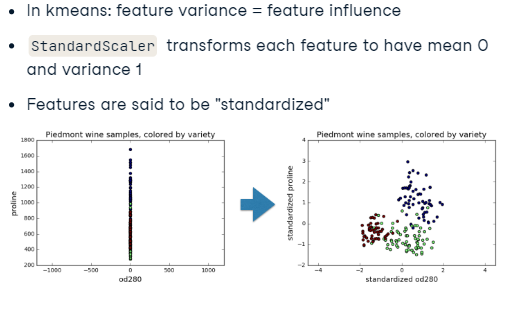

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled=scaler.transform(samples)

### similar methods
- standardscaler and KMeans have similar methods
- use fit()/transform() with StandardScaler
- use fit()/predict() with KMeans
### standardscaler, then KMeans
- need to perform two steps
- use sklearn pipeline to combine multiple steps
- data flows from one step into the next

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans=KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(samples)

C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anoushka chatterjee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [61]:
labels = pipeline.predict(samples)